In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

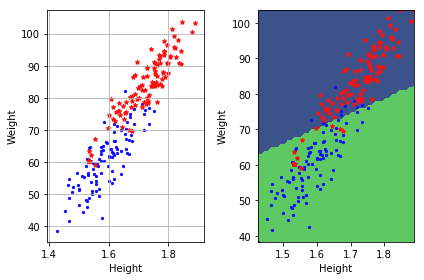

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [5]:
from scipy.special import expit

def sigmoid(t):
    """apply sigmoid function on t."""
    return expit(t)
def sigmoid_der(t):
    return sigmoid(t) * (1 - sigmoid(t))

In [17]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    
    sigma_logits = sigmoid(tx @ w)
    return - (y.T @ np.log(sigma_logits)) - ((1 - y.T) @ np.log(1 - sigma_logits))

In [18]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    
    sigma_logits = sigmoid(tx @ w)
    return - tx.T @ (np.multiply(y, 1 - sigma_logits) - np.multiply(1 - y, sigma_logits))

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [19]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    
    grad = calculate_gradient(y, tx, w)
    w -= gamma * grad
    loss = calculate_loss(y, tx, w)
    return loss, w

Demo!

Current iteration=0, loss=[[ 73.65627664]]
Current iteration=100, loss=[[ 43.42413267]]
Current iteration=200, loss=[[ 41.53790237]]
Current iteration=300, loss=[[ 41.09640225]]
Current iteration=400, loss=[[ 40.96414673]]
Current iteration=500, loss=[[ 40.91983717]]
Current iteration=600, loss=[[ 40.90409583]]
Current iteration=700, loss=[[ 40.89831588]]
Current iteration=800, loss=[[ 40.89615211]]
Current iteration=900, loss=[[ 40.89533264]]
Current iteration=1000, loss=[[ 40.89502009]]
Current iteration=1100, loss=[[ 40.89490037]]
Current iteration=1200, loss=[[ 40.89485439]]
Current iteration=1300, loss=[[ 40.8948367]]
Current iteration=1400, loss=[[ 40.89482988]]
Current iteration=1500, loss=[[ 40.89482726]]
loss=[[ 40.89482665]]


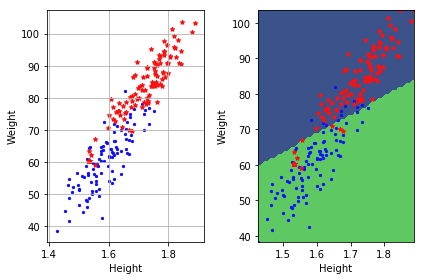

In [20]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [40]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    
    sigma_logits = sigmoid(tx @ w)[:,0]
    D = np.diag(np.multiply(sigma_logits, 1 - sigma_logits))
    return tx.T @ D @ tx

Write a function below to return loss, gradient, and hessian.

In [41]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [42]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w -= np.linalg.inv(hessian) @ gradient
    return loss, w

demo

Current iteration=0, the loss=[[ 138.62943611]]
Current iteration=1, the loss=[[ 63.41155374]]
Current iteration=2, the loss=[[ 47.3045862]]
Current iteration=3, the loss=[[ 41.99746742]]
Current iteration=4, the loss=[[ 40.95639864]]
Current iteration=5, the loss=[[ 40.89511994]]
Current iteration=6, the loss=[[ 40.89482562]]
Current iteration=7, the loss=[[ 40.89482561]]
loss=[[ 40.89482561]]


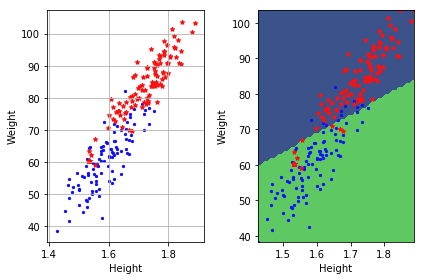

In [43]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [55]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    
    loss = calculate_loss(y, tx, w) + lambda_ * (w.T @ w)
    gradient = calculate_gradient(y, tx, w) + 2 * lambda_ * w
    hessian = calculate_hessian(y, tx, w) + 2 * lambda_ * np.eye(w.shape[0])
    
    return loss, gradient, hessian

In [56]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient, _ = penalized_logistic_regression(y, tx, w, lambda_)
    w -= gamma * gradient
    return loss, w, gradient

Current iteration=0, loss=[[ 138.62943611]], w_norm=1.0520575411219553, grad_norm=105.20575411219552
Current iteration=100, loss=[[ 45.83745887]], w_norm=4.376973371160467, grad_norm=1.597464721742297
Current iteration=200, loss=[[ 44.83053535]], w_norm=5.250411332327686, grad_norm=0.5341496972747158
Current iteration=300, loss=[[ 44.70562506]], w_norm=5.5695073695962884, grad_norm=0.20172255227819433
Current iteration=400, loss=[[ 44.68717105]], w_norm=5.693398129490378, grad_norm=0.07939000699233863
Current iteration=500, loss=[[ 44.68427448]], w_norm=5.742656591663733, grad_norm=0.03173494836186698
Current iteration=600, loss=[[ 44.68380922]], w_norm=5.7624253522629285, grad_norm=0.012763424853631238
Current iteration=700, loss=[[ 44.68373381]], w_norm=5.7703887122847295, grad_norm=0.005145863929124323
Current iteration=800, loss=[[ 44.68372154]], w_norm=5.77360136276663, grad_norm=0.0020767118383940956
loss=[[ 41.6824311]]


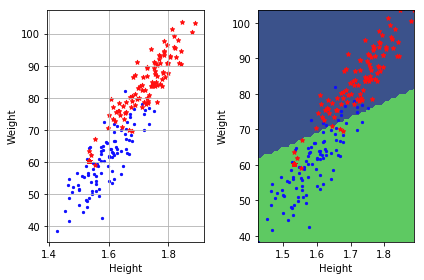

In [61]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.09
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w, grad = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}, w_norm={w}, grad_norm={grad}".format(
                i=iter, l=loss, w=np.linalg.norm(w), grad=np.linalg.norm(grad)))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

In [64]:
def logistic_regression_penalized_gradient_descent_worker(y, x, lambda_ = 0.01, gamma = 0.01):
    # init parameters
    max_iter = 10000
    threshold = 1e-8

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    loss = None
    
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss_, w, grad = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # converge criterion
        
        do_break = iter > 0 and np.abs(loss_ - loss) < threshold
        loss = loss_
        if do_break: break
    
    return loss, w, grad
    
logistic_regression_penalized_gradient_descent_worker(y, x, lambda_ = 0.01, gamma = 0.01)

(array([[ 41.42457851]]), array([[ 0.22823233],
        [ 2.31756825],
        [-6.75051189]]), array([[ -3.48501142e-05],
        [ -5.23576670e-04],
        [  8.44607398e-04]]))

In [70]:
from tqdm import tqdm

In [71]:
lambda_range = np.logspace(-5, 0, num=10)

In [75]:
losses, ws, grads = [], [], []
for lambda_ in tqdm(lambda_range):
    loss, w, grad = logistic_regression_penalized_gradient_descent_worker(y, x, lambda_ = lambda_)
    [x.append(np.linalg.norm(y)) for x, y in zip((losses, ws, grads), (loss, w, grad))]

100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


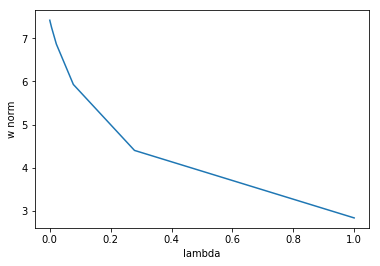

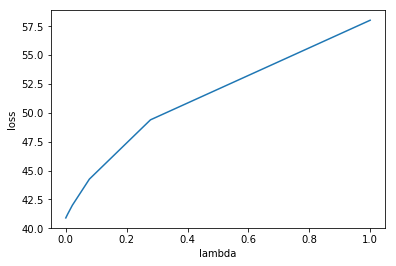

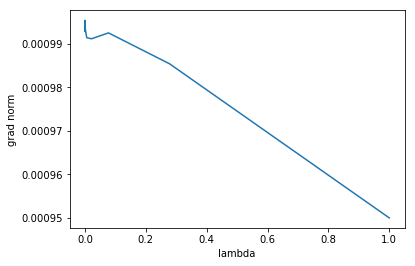

In [87]:
to_plot = [(ws, 'w norm'), (losses, 'loss'), (grads, 'grad norm')]
for p in to_plot:
    plt.plot(lambda_range, p[0], label=p[1])
    plt.xlabel('lambda')
    plt.ylabel(p[1])
    plt.show()